<a href="https://colab.research.google.com/github/YashaswiniGA/ML-Lab/blob/main/1BM21CS253_(ML_Lab_Test).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

### LOAD DATASET

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

### PLOT

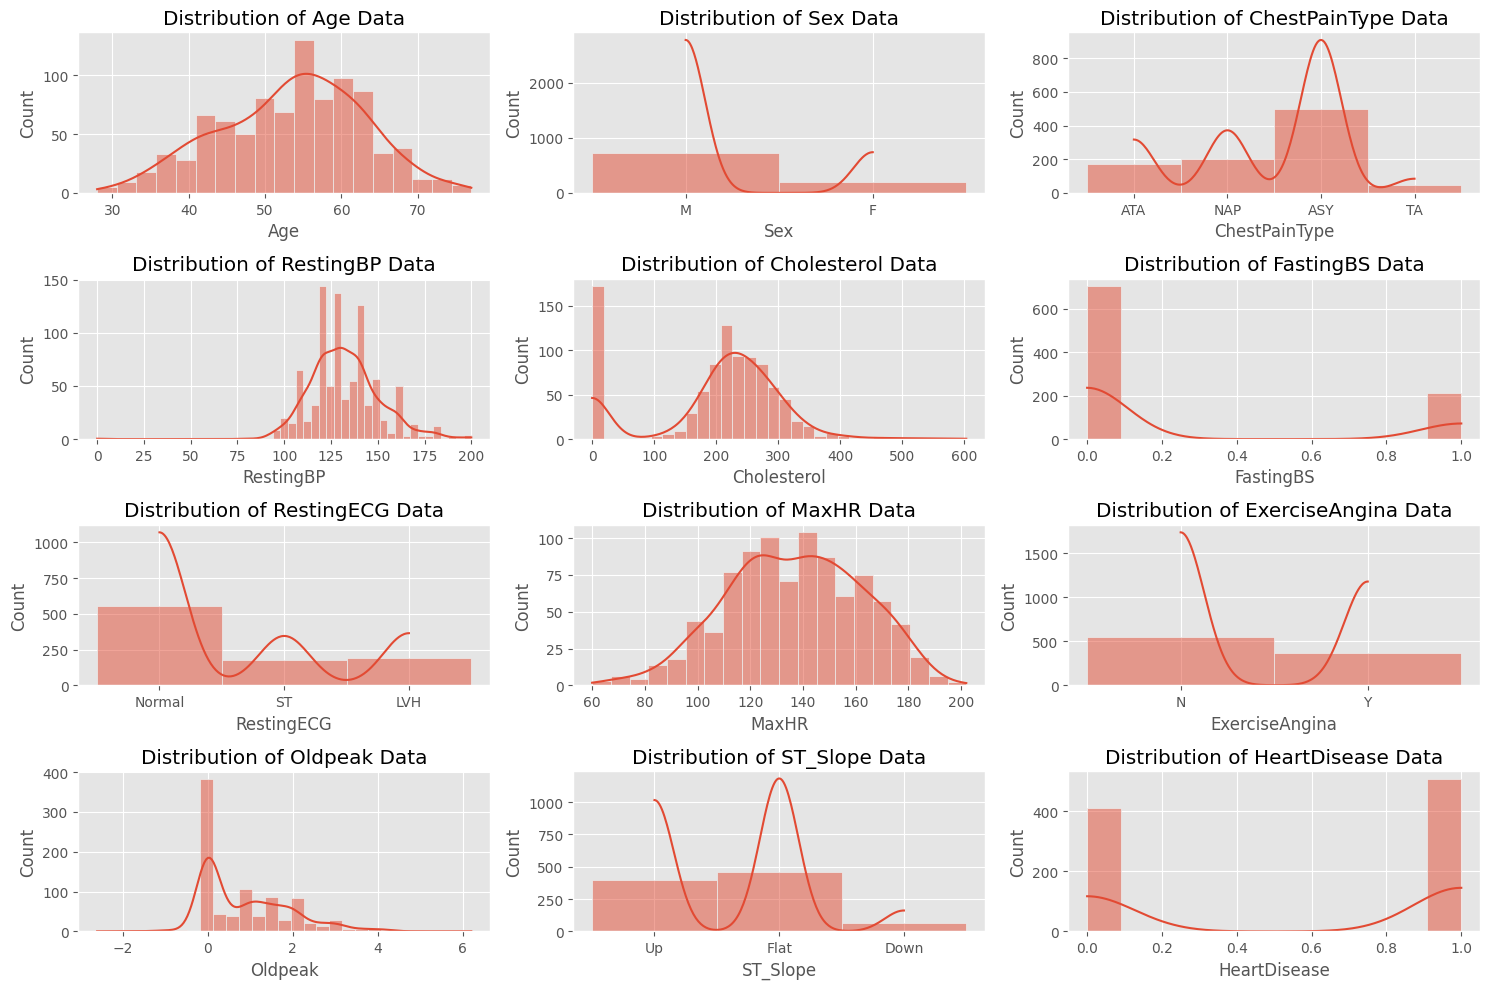

In [5]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

### IDENTIFY AND REMOVE OUTLIERS

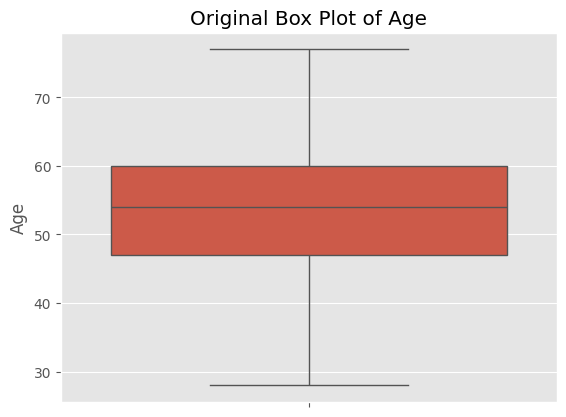

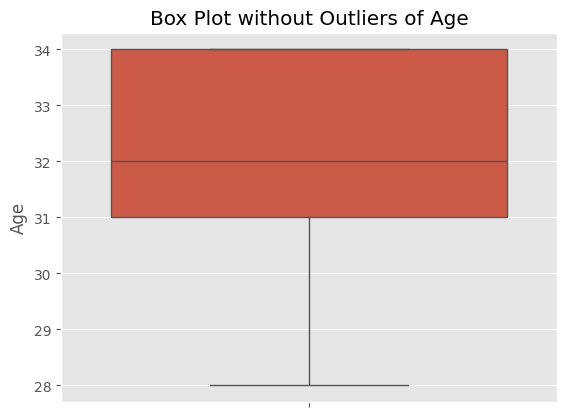

In [14]:
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 34

no_outliers = removal_box_plot(df, 'Age', threshold_value)

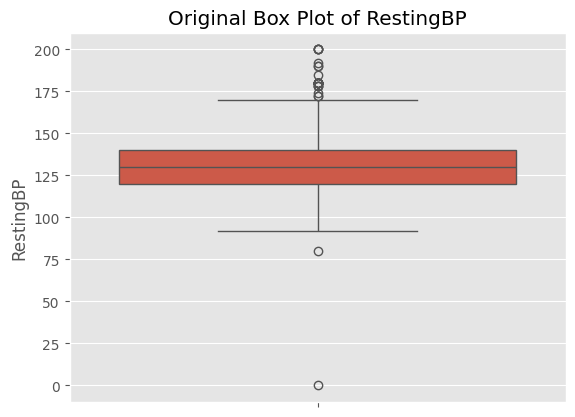

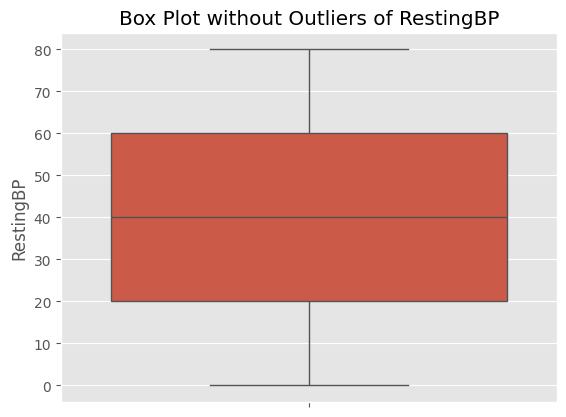

In [13]:
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 80

no_outliers = removal_box_plot(df, 'RestingBP', threshold_value)

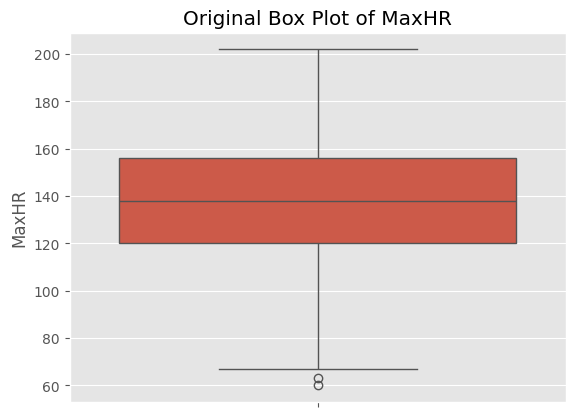

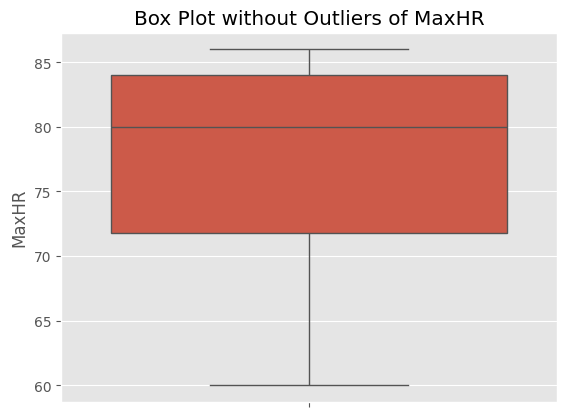

In [19]:
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 86

no_outliers = removal_box_plot(df, 'MaxHR', threshold_value)

### ONE HOT ENCODING

In [21]:
df[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(df[col].value_counts())

The distribution of categorical valeus in the Sex is : 
Sex
M    725
F    193
Name: count, dtype: Int64
The distribution of categorical valeus in the ChestPainType is : 
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: Int64
The distribution of categorical valeus in the RestingECG is : 
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: Int64
The distribution of categorical valeus in the ExerciseAngina is : 
ExerciseAngina
N    547
Y    371
Name: count, dtype: Int64
The distribution of categorical valeus in the ST_Slope is : 
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: Int64


In [24]:
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()
#AGE M-1, F-0
#CHEST PAIN TYPE  ATA-1, NAP-2, ASY-0
#RESTING ECG NORMAL -1, ST-2, LVH-0
#EXERCISE ANGINA   N-0,Y-1
#ST_SLOPE   UP-2, FLAT-1, DOWN-0

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


### APPLY SCALING

In [25]:
#CHECK FOR NULL VALUES
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

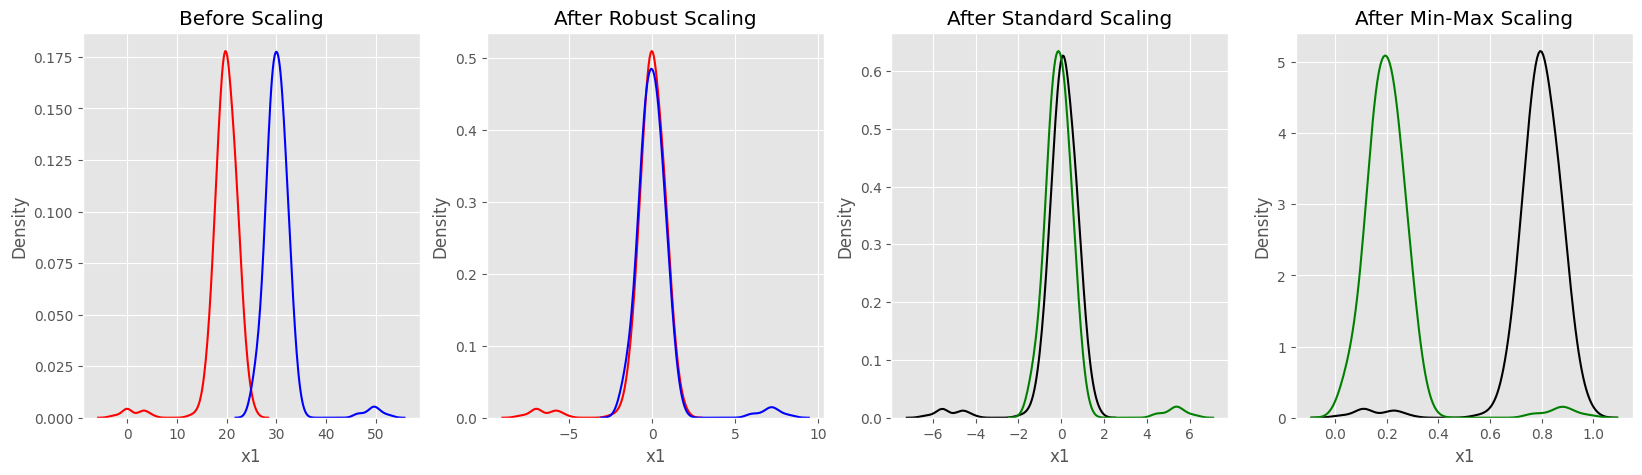

In [26]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

### PREPARE THE DATESET

In [32]:

y=df_tree["HeartDisease"]
X=df_tree.drop(["HeartDisease"], axis=1)

### TRAIN TEST SPLIT

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=42, train_size=0.8)

### TRAIN THE DATA WITH LOGISTIC REGRESSION MODEL

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
from sklearn.metrics import accuracy_score
y_predicted = model.predict(X_test)
accuracy= accuracy_score(y_predicted, y_test)
print(accuracy)

0.8315217391304348


### USE PCA TO MREDUCE DIMENSIONS

In [40]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(df_tree)

StandardScaler()

In [41]:
scaled_data=scaler.transform(df_tree)

In [42]:
from sklearn.decomposition import PCA

pca=PCA(n_components=8)
pca.fit(scaled_data)

PCA(n_components=8)

In [43]:
x_pca=pca.transform(scaled_data)

In [44]:

scaled_data.shape

(918, 12)

In [45]:

x_pca.shape

(918, 8)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_pca,y ,random_state=42, train_size=0.8)

### NOW AGAIN APPLY LOGISTIC REGRESSION TO REDUCED DIMENSION

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [49]:
from sklearn.metrics import accuracy_score
y_predicted = model.predict(X_test)
accuracy= accuracy_score(y_predicted, y_test)
print(accuracy)

0.9130434782608695
